### https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [147]:
import pandas as pd
import numpy as np

In [148]:
import sys
sys.path.append('../ames') # path the the directory
import config
from data_prep import clean, add_features, dummify

In [149]:
housing = clean(config.HOUSING_CSV)
housing = add_features(housing)
housing = pd.read_pickle(config.HOUSING_PICKLE)

In [150]:
the_chosen_variables = ['1stFlrSF','2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 
             'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 
             'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 
             'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
             'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'MSSubClass', 
             'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 
             'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF', 
             'YearBuilt', 'YearRemodAdd', 'YrSold','DecadeBuilt', 'DecadeRemodel',
             'TotalLivingArea','UnusedLotSize','HasPool','HouseAge', 'HouseAgeSq']

In [151]:
the_chosen_variables.remove('LotArea')
the_chosen_variables.remove('GrLivArea')
the_chosen_variables.remove('GarageArea')

In [152]:
limited_variables = ['TotalLivingArea','UnusedLotSize','HasPool','OverallQual','GarageArea','YearBuilt']
X = housing[the_chosen_variables]

dummy_vars = {'Neighborhood':'Nbhd','LotConfig':'LC','SaleCondition':'SC'}
dummy_df = dummify(housing, dummy_vars)
X = pd.concat([X,dummy_df], axis=1)
y = np.log(housing['SalePrice'])

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [154]:
from xgboost import XGBRegressor
from matplotlib import pyplot
# fit model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)

[0.00584849 0.00532246 0.00061674 0.00433695 0.00146512 0.00248059
 0.0027305  0.00213196 0.00489858 0.00290129 0.08682798 0.00456424
 0.10506424 0.0043618  0.00112577 0.02067279 0.00229143 0.00252173
 0.00398019 0.00284831 0.00201876 0.0063726  0.00472326 0.01440671
 0.2782064  0.00063897 0.00555619 0.0070882  0.00549543 0.00322055
 0.07960523 0.00955902 0.00152861 0.         0.         0.13005608
 0.007894   0.         0.         0.         0.00049956 0.00133434
 0.         0.00456966 0.00795334 0.00356513 0.0341223  0.00345228
 0.00237842 0.00103186 0.00689886 0.00403134 0.         0.00122829
 0.00120588 0.0017492  0.         0.00124729 0.00101152 0.00029009
 0.0090932  0.00498248 0.00108224 0.00989977 0.01185594 0.00720297
 0.00334793 0.00163358 0.00094523 0.0007094  0.00479083 0.00358412
 0.00206022 0.00913705 0.         0.00063206 0.0139887  0.00534487
 0.00977908]


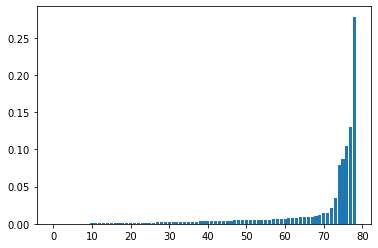

In [155]:
# plot
pyplot.bar(range(len(model.feature_importances_)), sorted(model.feature_importances_))
pyplot.show()

In [156]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, model.predict(X_test), squared=False)
print(rms)

0.11431022049682059


In [165]:
print(model.score(X_test, y_test))

0.9143178029410656


## Feature Importance

In [157]:
d = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Importance'])
d.sort_values('Importance',ascending=False).head(25)

,Importance
OverallQual,0.278206
TotalLivingArea,0.130056
GarageCars,0.105064
Fireplaces,0.086828
YearBuilt,0.079605
Nbhd_Crawfor,0.034122
KitchenAbvGr,0.020673
OverallCond,0.014407
SC_Family,0.013989
Nbhd_Somerst,0.011856


In [158]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'learning_rates': 0.001}

In [160]:
# Number of trees in random forest
n_estimators = [40,100] #[int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Maximum number of levels in tree
max_depth = [i*2+3 for i in range(1,5)] + [None]
# Minimum number of samples required to split a node
learning_rates = [10**i for i in range(-3,2)]
# Method of selecting learning rate
colsample_bytree = [0.5, 0.8, 1]
# number of columns used by each tree
gamma = [0,1,5]
# Acts as a regularization parameter

bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
             'learning_rates': learning_rates,
             'colsample_bytree': colsample_bytree,
             'gamma': gamma}

In [161]:
%timeit
xgb = XGBRegressor()
from sklearn.model_selection import GridSearchCV
xgb_Grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, verbose=2, n_jobs=4)
xgb_Grid.fit(X_train,y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   38.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  4.8min
/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 14.6min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 19.7min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 25.2min
[Parallel(n_jobs=4)]: Done 4500 out of 45

[12:25:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { learning_rates } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [162]:
xgb_Grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rates': 0.001,
 'max_depth': 5,
 'n_estimators': 100}

In [163]:
xgb = XGBRegressor(n_estimators =100,
                    max_depth=5,
                    learning_rates=0.001,
                    colsample_bytree=0.5,
                    gamma=0,
                    random_state=42) 

xgb.fit(X_train, y_train) 
print(xgb.score(X_train, y_train))

[12:25:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { learning_rates } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9925166357611752


In [164]:
print(xgb.score(X_test, y_test))


0.9167887878112693
